# Task 3 - Decision Trees

**in the Task For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### loading the Iris dataset

In [7]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


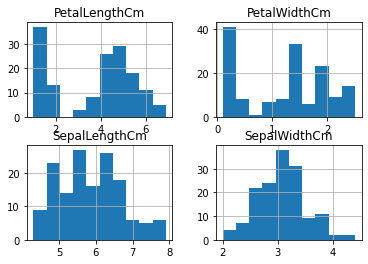

In [9]:
viz = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
viz.hist()
plt.show()

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis =1)
df1.shape

(150, 5)

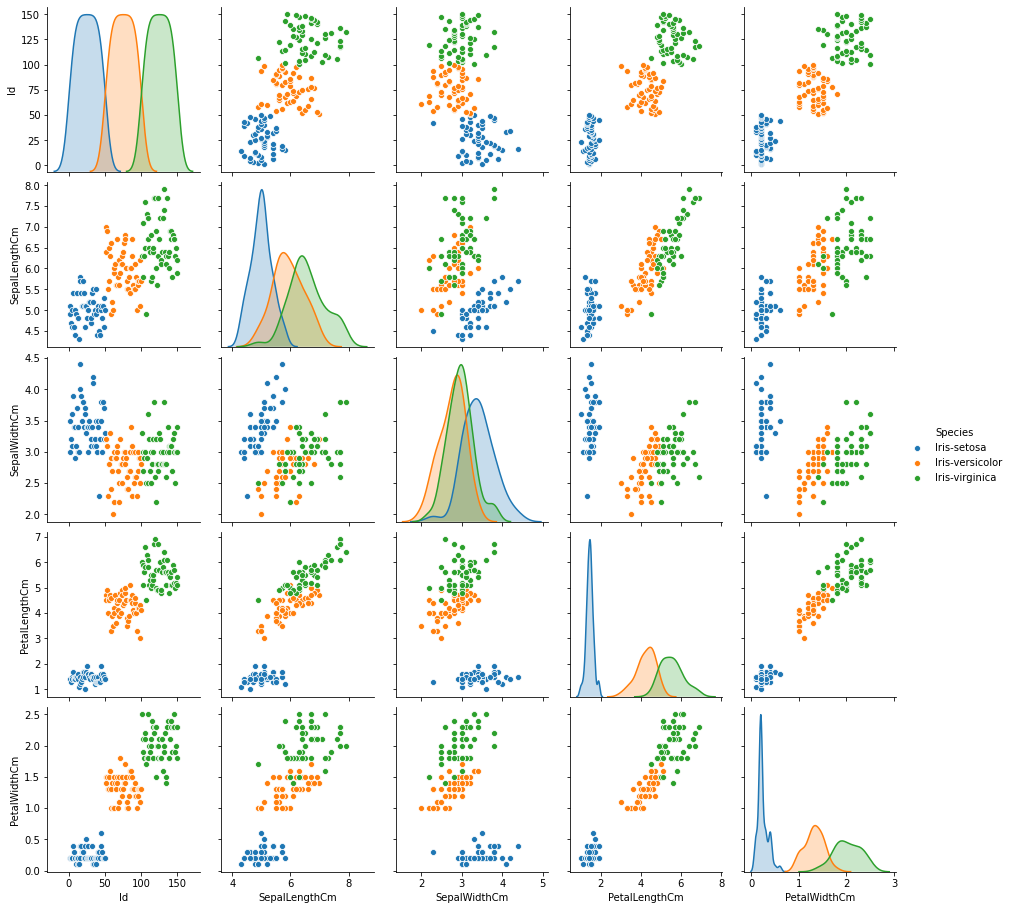

In [14]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(df, hue = 'Species')

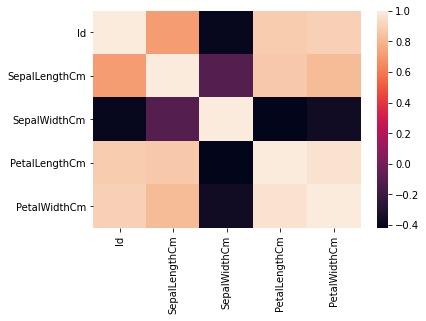

In [15]:
# correlation matrix
sns.heatmap(df.corr())

In [16]:
# Defining the attributes and labels

X = df.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values  #Labels

print("The shape of the data is-", df.shape)

The shape of the data is- (150, 6)


In [17]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

print("Training split - ", X_train.shape)
print("Testing split - ", X_test.shape)

Training split -  (120, 4)
Testing split -  (30, 4)


In [18]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [19]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

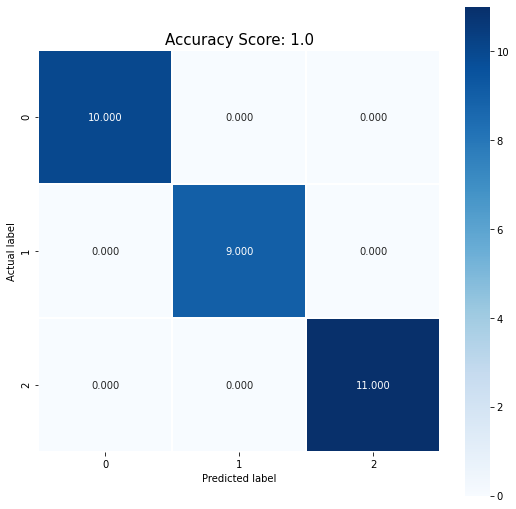

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


In [22]:

from sklearn.tree import plot_tree


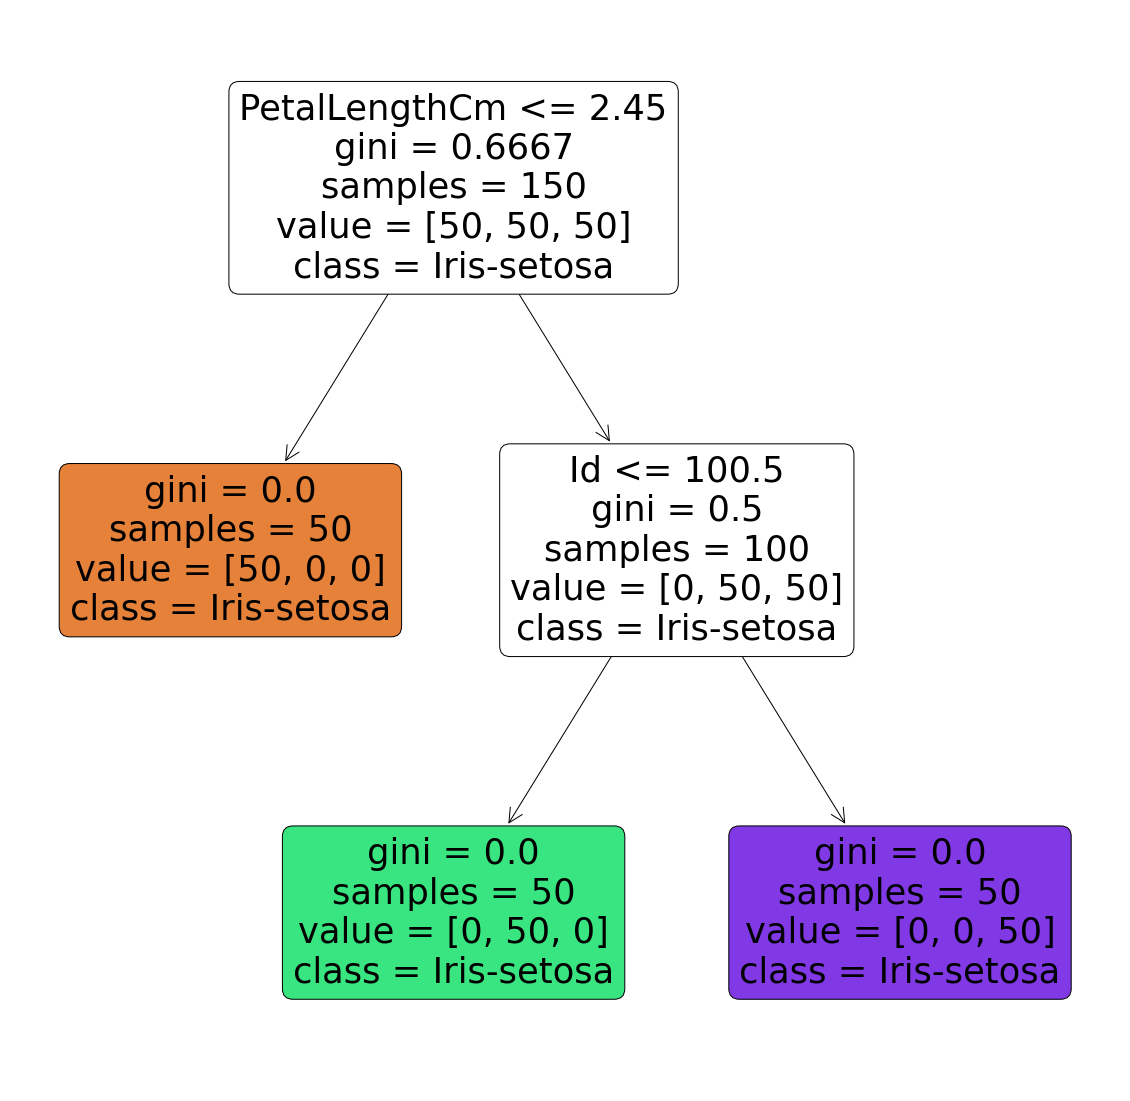

In [27]:

# Visualising the graph
plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);